In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_100+_yds_salary_18-19')

In [3]:
tes.dtypes

NAME              object
100+ YDS           int64
100+ YDS_rank    float64
salary             int64
dtype: object

In [4]:
tes.head()

,NAME,100+ YDS,100+ YDS_rank,salary
0,Travis Kelce,5,1.5,9368400
1,Zach Ertz,5,1.5,8500000
2,Jared Cook,4,3.5,5300000
3,Rob Gronkowski,2,5.0,9000000
4,Trey Burton,1,9.0,8000000


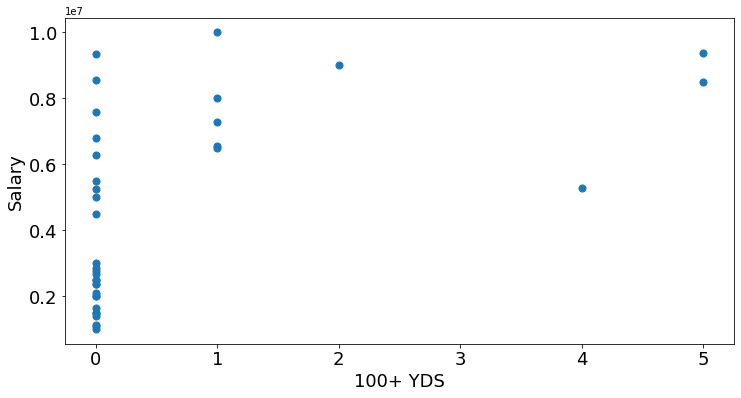

In [5]:
ax = tes.plot(kind="scatter", x = '100+ YDS',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('100+ YDS', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['100+ YDS', 'salary']])

In [7]:
X.mean(axis = 0)

array([-2.77555756e-17, -7.70988212e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.44183608, -0.90018935],
       [ 0.46708386,  0.998856  ],
       [ 3.09285258,  1.0870351 ],
       [-0.25247776,  1.48893367],
       [-0.44183608,  0.33204805]])

In [11]:
km.predict(X)

array([2, 2, 2, 1, 1, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 4,
       4, 0, 0, 0, 3, 4, 4, 4, 4, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,100+ YDS,100+ YDS_rank,salary,clusters
0,Travis Kelce,5,1.5,9368400,2
1,Zach Ertz,5,1.5,8500000,2
2,Jared Cook,4,3.5,5300000,2
3,Rob Gronkowski,2,5.0,9000000,1
4,Trey Burton,1,9.0,8000000,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[-2.22044605e-16,  2.02564122e+06],
       [ 1.20000000e+00,  7.47000000e+06],
       [ 4.66666667e+00,  7.72280000e+06],
       [ 2.50000000e-01,  8.87500000e+06],
       [ 0.00000000e+00,  5.55833333e+06]])

In [14]:
tes.groupby('clusters')[['100+ YDS', 'salary']].mean()

,100+ YDS,salary
clusters,,
0,0.000000,2.025641e+06
1,1.200000,7.470000e+06
2,4.666667,7.722800e+06
3,0.250000,8.875000e+06
4,0.000000,5.558333e+06


In [15]:
centroids = tes.groupby('clusters')[['100+ YDS', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

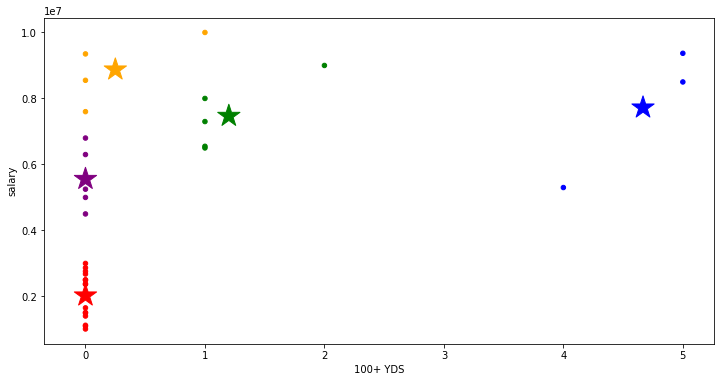

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = '100+ YDS', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = '100+ YDS', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

4.622845835192146

In [18]:
silhouette_score(X, km.labels_)

0.6250944162327763